# Финальный проект

In [43]:
import pandas as pd
from pandas.api.types import is_numeric_dtype
df_raw = pd.read_csv('../datasets/real_estate_data_.csv', sep='\t')

In [44]:
df_raw.drop_duplicates()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


In [45]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [46]:
# здесь я оставлю в датафрейме только те города где 50+ объявлений

# получаю таблицу с количеством объявлений по городам
over_fifty = df_raw.groupby('locality_name').agg({'total_images': 'count'})

# изменияю название колонны для удобства
over_fifty = over_fifty.rename({'total_images': 'amount'}, axis=1)

# получаю таблицу с кол-вом объявлений больше 50шт., отстортированную по убыванию
over_fifty = over_fifty.query('amount > 50').sort_values('amount', ascending=False).reset_index()

'''
Произвожу слияние таблиц (over_fifty and df), для того чтобы получить оригинальный 
датасет, но содержащий города в которых кол-во объявлений больше 50шт.
Использовать буду параметр inner, так как он самый подходящий в этом случае
Колонна по которой будет происходить отбор - locality_name
'''
df_raw = df_raw.merge(over_fifty, on=['locality_name'], how='inner')

df_raw.groupby('locality_name').agg({'total_images': 'count'})

,total_images
locality_name,
Волхов,111
Всеволожск,398
Выборг,237
Гатчина,307
Кингисепп,104
Кириши,125
Кировск,84
Колпино,338
Коммунар,89


In [47]:
# также я заметил что колонна first_day_exposition имеет тип данных object, попробую перевести ее в тип данных datetime
df_raw['first_day_exposition'] = pd.to_datetime(df_raw['first_day_exposition'])

In [48]:
# Немного вошел во вкус и написал следующую функцию которая заполняет датасет.
# Надоело постоянно делать это по одному, тогда как данная функция заполняет автоматически все строки в зависимости от указанных аргументов функции.
# Подробное описание внутри функции.

def fill_nan_custom(*, data, str_val='Неизвестно', bool_val=False, num_median=True, num_mean=False):
    """
    При использовании этой фунции необходимо указывать название аргументов.
    Функция сыровата, но работает, не стал уделять ей слишком много времени на данном этапе, в будущем буду ее дорабатывать.
    
    data - датафрейм который необходимо заполнить.
    str_val - значение которое нужно вставить для типа данных object. ("Неизвестно" по умолчанию)
    bool_val - значение которое нужно вставить для типа данных bool. (False по умолчанию)
    num_median - заполнить цифровые значения(int, float) медианой. (True по умолчанию)
    num_mean - заполнить цифровые значения(int, float) средним числом. (False по умолчанию)
    """
    temp_data = data.copy() # Создаем копию датафрейма, который затем будем изменять.

    # Проверка заполненности аргументов функции.
    if (not num_median) and (not num_mean):
        print('At least one of the arguments must be assigned as True.')
        return 0
        
    elif num_median and num_mean:
        print('Both num_median and num_mean can not be assigned as True at the same time.')
        return 0
        
    # Проходим по каждой колонне и проихводим заполнение
    total_rows = len(data) # Максимально возможное кол-во рядов в колоннах.
    for column_name in temp_data:
        current_column_rows = temp_data[column_name].count() # Кол-во рядов в текущей колонне.
        if current_column_rows != total_rows:
            setter = '' # Переменная которая используется для вставки значения вместо NaN
            data_type = temp_data[column_name].dtype # Узнаем тип данных колонны
            # print(f'{column_name} - {data_type}')
            # Присваиваем значения переменной setter в зависимости от типа данных
            if is_numeric_dtype(temp_data[column_name]) and num_median:
                setter = temp_data[column_name].median()
            elif is_numeric_dtype(temp_data[column_name]) and num_mean:
                setter = temp_data[column_name].mean()
            else:
                setter = str_val if data_type == 'object' else bool_val
            temp_data[column_name] = temp_data[column_name].fillna(setter) # Итоговое изменение колонны
        #     print(f'{column_name.upper()} before: {current_column_rows}\n{column_name.upper()} NOW: {temp_data[column_name].count()}\n')
        # else:
        #     print(f'{column_name.upper()} is already full.\n')
    return temp_data # функция возвращает копию датасета, не меняя оригинальный.

In [49]:
df = fill_nan_custom(data=df_raw) # c этих пор наш датафрейм полностью заполнен
# bool - заполнены значением False
# object - заполнены значением Неизвестно
# int/float - заполнены медианой по значениям в колонне

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21636 entries, 0 to 21635
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          21636 non-null  int64         
 1   last_price            21636 non-null  float64       
 2   total_area            21636 non-null  float64       
 3   first_day_exposition  21636 non-null  datetime64[ns]
 4   rooms                 21636 non-null  int64         
 5   ceiling_height        21636 non-null  float64       
 6   floors_total          21636 non-null  float64       
 7   living_area           21636 non-null  float64       
 8   floor                 21636 non-null  int64         
 9   is_apartment          21636 non-null  object        
 10  studio                21636 non-null  bool          
 11  open_plan             21636 non-null  bool          
 12  kitchen_area          21636 non-null  float64       
 13  balcony         

In [51]:
df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,amount
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,Неизвестно,...,1.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,94.0,15721
1,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,Неизвестно,...,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,15721
2,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,30.1,9,Неизвестно,...,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,15721
3,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,Неизвестно,...,1.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,15721
4,5,7915000.0,71.6,2019-04-18,2,2.65,24.0,30.1,22,Неизвестно,...,2.0,Санкт-Петербург,23982.0,11634.0,0.0,455.0,0.0,502.5,94.0,15721
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21631,3,1900000.0,18.9,2016-04-04,1,2.65,16.0,16.0,12,Неизвестно,...,0.0,Тосно,26667.0,13056.0,0.0,455.0,0.0,502.5,115.0,104
21632,8,2600000.0,36.0,2017-01-25,2,2.50,5.0,24.0,2,False,...,1.0,Тосно,26667.0,13056.0,0.0,455.0,0.0,502.5,45.0,104
21633,3,3150000.0,45.3,2017-12-08,1,2.65,10.0,22.5,9,Неизвестно,...,2.0,Тосно,26667.0,13056.0,0.0,455.0,0.0,502.5,124.0,104
21634,9,3200000.0,51.0,2016-07-02,2,2.50,9.0,30.0,9,False,...,1.0,Тосно,26667.0,13056.0,0.0,455.0,0.0,502.5,120.0,104


In [52]:
# Посмотрим кол-во объявлений по каждому городу
# Каждая строка это объявление на какую-либо квартиру/помещение

df.groupby('locality_name').agg({'total_images': 'count'}).sort_values(by='total_images', ascending=False)

,total_images
locality_name,
Санкт-Петербург,15721
посёлок Мурино,522
посёлок Шушары,440
Всеволожск,398
Пушкин,369
Колпино,338
посёлок Парголово,327
Гатчина,307
деревня Кудрово,299


In [64]:
# хотелось бы проверить за какой период у нас данные, это мы можем вычислить по колонне first_day_exposition

dates = df[['locality_name', 'first_day_exposition']].sort_values(by='first_day_exposition', ascending=False).reset_index()
dates.rename({'first_day_exposition': 'timestamp'}, axis=1, inplace=True)

In [67]:
dates['year_part'] = dates['timestamp'].dt.year

In [71]:
dates # тут легко можно увидеть что объявления из датафрейма были опубликованы в периоде с 2014 по 2019 года

,index,locality_name,timestamp,year_part
0,11921,Санкт-Петербург,2019-05-03,2019
1,18499,Колпино,2019-05-03,2019
2,7258,Санкт-Петербург,2019-05-03,2019
3,21004,Сосновый Бор,2019-05-03,2019
4,17621,Пушкин,2019-05-03,2019
...,...,...,...,...
21631,10522,Санкт-Петербург,2014-11-27,2014
21632,8799,Санкт-Петербург,2014-11-27,2014
21633,4457,Санкт-Петербург,2014-11-27,2014
21634,3182,Санкт-Петербург,2014-11-27,2014


In [89]:
# посчитаем кол-во объявлений за каждый год и положим все это на гистограмму.

year_activity = dates.groupby('year_part').agg({'locality_name': 'count'}).reset_index()
year_activity.rename({'locality_name': 'amount'}, axis=1, inplace=True)

In [90]:
year_activity

,year_part,amount
0,2014,127
1,2015,1086
2,2016,2547
3,2017,7543
4,2018,7709
5,2019,2624


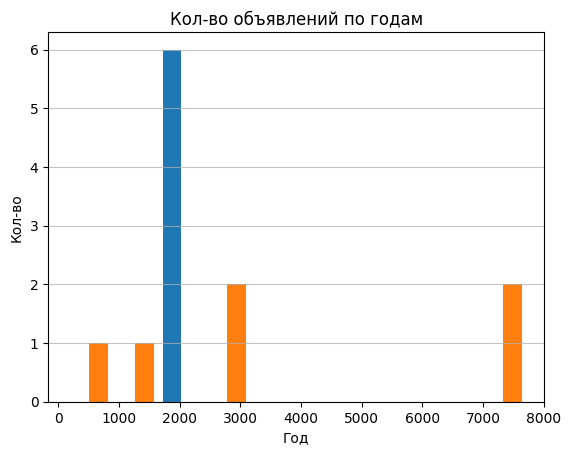

In [91]:
import matplotlib.pyplot as plt


plt.hist(year_activity)  # Adjust the number of bins as needed
plt.title('Кол-во объявлений по годам')
plt.xlabel('Год')
plt.ylabel('Кол-во')
plt.grid(axis='y', alpha=0.75)

# Show the plot
plt.show()